In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow


In [28]:
df = pd.read_csv('./sign_mnist_test.csv')

In [29]:
df.iloc[:,0].unique().size

24

In [30]:
df.iloc[:,0].value_counts().sort_index()

label
0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
10    331
11    209
12    394
13    291
14    246
15    347
16    164
17    144
18    246
19    248
20    266
21    346
22    206
23    267
24    332
Name: count, dtype: int64

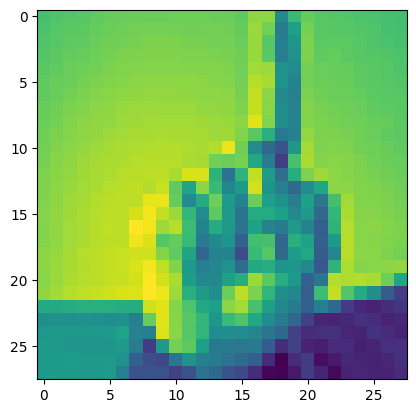

In [79]:
plt.imshow(df.iloc[4,1:].values.reshape((28,28)))

In [31]:
y = df.iloc[:,0].values

In [32]:
y.reshape((7172,1))

array([[ 6],
       [ 5],
       [10],
       ...,
       [ 2],
       [ 4],
       [ 2]])

In [33]:
x = df.drop('label',axis = 1).values.reshape(7172,28,28,1)

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.85)

In [35]:
x_train.shape[1:]

(28, 28, 1)

In [36]:
x.shape

(7172, 28, 28, 1)

In [37]:
y_test = y_test.reshape((1076,1))

In [38]:
y_train = y_train.reshape((6096,1))


In [39]:
y_train.squeeze().max()

np.int64(24)

In [40]:
import keras
num_classes = 26

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation



# Ensure x_train is defined and has the correct shape
# x_train = ...

model_l = Sequential([
    Conv2D(32, (5,5), strides=(2,2), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32, (5,5), strides=(2,2)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])

model_l.summary()

/home/choclo/Documents/ML/hands/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │        13,338 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 26)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,850 (413.48 KB)

 Trainable params: 105,850 (413.48 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow import keras
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(0.0005)

# Let's train the model using RMSprop
model_l.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_l.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9606 - loss: 0.1527 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9676 - loss: 0.1131 - val_accuracy: 1.0000 - val_loss: 3.0086e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.1170 - val_accuracy: 1.0000 - val_loss: 1.9403e-04
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.0949 - val_accuracy: 1.0000 - val_loss: 1.2179e-04
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9697 - loss: 0.1165 - val_accuracy: 1.0000 - val_loss: 1.8114e-04
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.1030 - val_accuracy: 1.0000 - val_loss: 5.8281e-05
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9755 - loss: 0.1005 - val_accuracy: 0.9981 - val_loss: 0.0050
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9718 - loss: 0.099

In [57]:
y_pred = model_l.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [58]:

for prediciton in y_pred:
    for j in prediciton:
        if prediciton.max() == j:
            j =1
        else:
            j=0


In [59]:
import numpy as np

y_pred2 = []
for arr in y_pred:

    # Find the index of the maximum value
    max_index = np.argmax(arr)

    # Create a one-hot encoded vector
    one_hot = np.zeros_like(arr)
    one_hot[max_index] = 1
    y_pred2.append(one_hot)


In [60]:
sum=0
for i,j in zip(y_test,y_pred2):
    print(i.argmax(),j.argmax())
    if i.argmax()!=j.argmax():
        sum+=1

sum

22 22
1 1
3 3
11 11
13 13
23 23
6 6
12 12
11 11
7 7
11 11
23 23
22 22
7 7
3 3
4 4
14 14
7 7
1 1
1 1
10 10
15 15
24 24
21 21
0 0
15 15
18 18
0 0
0 0
11 11
5 5
16 16
24 24
19 19
18 18
2 2
3 3
14 14
1 1
4 4
19 19
8 8
15 15
8 8
14 14
21 21
7 7
16 16
10 10
15 15
7 7
1 1
15 15
11 11
24 24
2 2
24 24
11 11
19 19
18 18
7 7
2 2
7 7
17 17
15 15
1 1
13 13
22 22
10 10
4 4
10 10
7 7
0 0
11 11
22 22
21 21
4 4
19 19
24 24
4 4
18 18
24 24
6 6
13 13
6 6
6 6
16 16
8 8
13 13
12 12
23 23
18 18
0 0
7 7
19 19
24 24
4 4
1 1
11 11
23 23
13 13
15 15
2 2
6 6
4 4
1 1
17 17
15 15
20 20
4 4
20 20
14 14
5 5
8 8
0 0
7 7
7 7
23 23
13 13
0 0
6 6
4 4
14 14
6 6
12 12
22 22
7 7
12 12
24 24
6 6
1 1
18 18
6 6
12 12
22 22
11 11
14 14
12 12
23 23
18 18
0 0
4 4
4 4
4 4
18 18
0 0
2 2
8 8
19 19
8 8
14 14
23 23
11 11
13 13
18 18
15 15
2 2
0 0
22 22
15 15
6 6
8 8
23 23
23 23
5 5
13 13
11 11
2 2
12 12
13 13
21 21
3 3
23 23
6 6
5 5
10 10
1 1
10 10
23 23
7 7
15 15
20 20
1 1
10 10
1 1
4 4
0 0
13 13
15 15
15 15
20 20
2 2
23 23
24 24
10

0

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred2)

1.0